# **A Diffusion Model Approach to Drug Repurposing**


In [ ]:
!pip install --upgrade --force-reinstall pykeen==1.10.0 pystow==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 822.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Leukemia Drugs repositioining for Breast Cancer (t-SNE on Trastuzumab)**


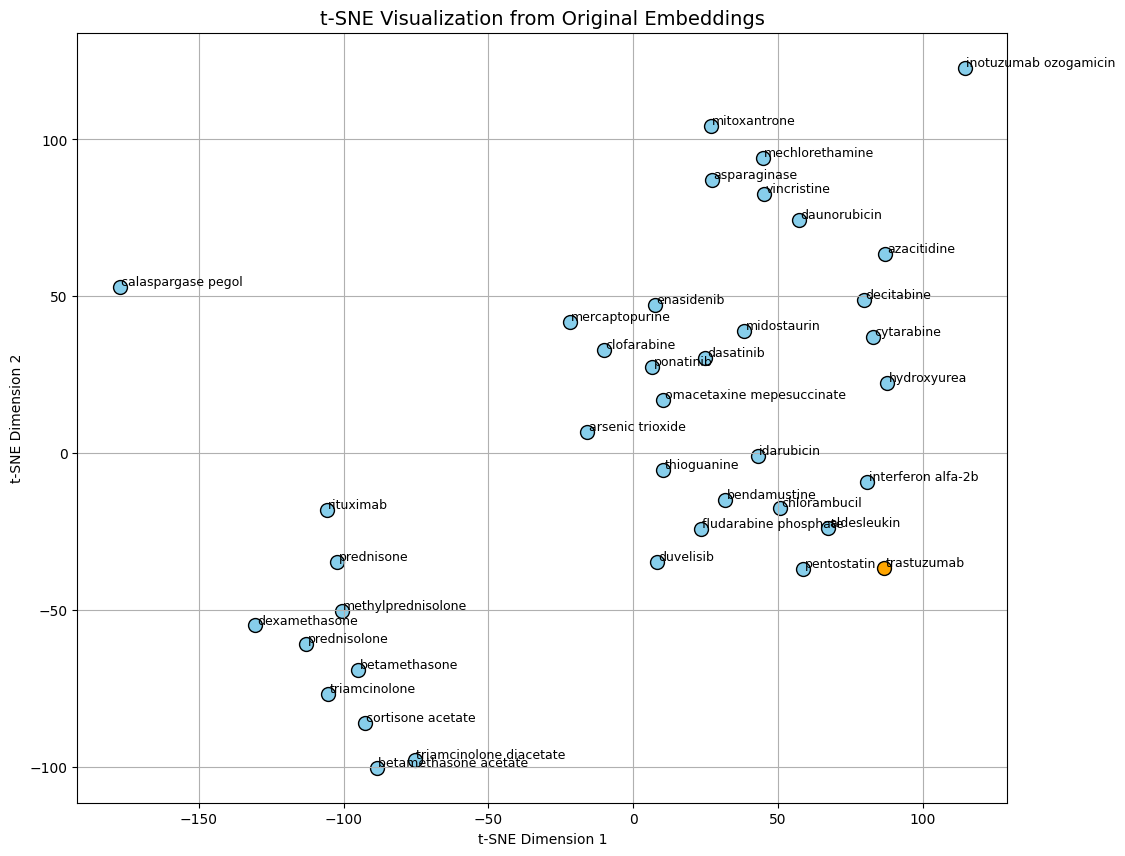

In [ ]:
# --- Install Required Library ---
#!pip install pykeen

# --- Upload Files ---
#from google.colab import files
#uploaded = files.upload()  # Upload both: original_node_embeddings.npy and positive_dataset.csv

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pykeen.triples import TriplesFactory

# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/diffusion_model/positive_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]

# --- Create Entity Mapping using PyKEEN ---
triples_factory = TriplesFactory.from_labeled_triples(df.values)
entity_to_id = triples_factory.entity_to_id
id_to_entity = {v: k for k, v in entity_to_id.items()}

# --- Load Embeddings ---
embeddings = np.load("/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy")

# --- Define Target CUIs ---
target_cuis = [  # your full list of CUIs including C0728747
    'C0218986', 'C0052416', 'C0003993', 'C0004475', 'C0525079', 'C0005308', 'C0005310', 'C2699709', 'C0008163', 'C0092777', 'C0056391', 'C0010711', 'C1455147', 'C0011015', 'C0049065', 'C0011777', 'C4079854', 'C4519428', 'C0060483', 'C0020402', 'C0020789', 'C1567130', 'C0021735', 'C0025033', 'C0000618', 'C0025815', 'C0526371', 'C0026259', 'C0062941', 'C0030896', 'C2987417', 'C0032950', 'C0032952', 'C0393022', 'C0039902', 'C0040864', 'C0040867', 'C0042679', 'C0728747'
]

cui_name_pairs = [('C0218986', 'aldesleukin'),
 ('C0052416', 'arsenic trioxide'),
 ('C0003993', 'asparaginase'),
 ('C0004475', 'azacitidine'),
 ('C0525079', 'bendamustine'),
 ('C0005308', 'betamethasone'),
 ('C0005310', 'betamethasone acetate'),
 ('C2699709', 'calaspargase pegol'),
 ('C0008163', 'chlorambucil'),
 ('C0092777', 'clofarabine'),
 ('C0056391', 'cortisone acetate'),
 ('C0010711', 'cytarabine'),
 ('C1455147', 'dasatinib'),
 ('C0011015', 'daunorubicin'),
 ('C0049065', 'decitabine'),
 ('C0011777', 'dexamethasone'),
 ('C4079854', 'duvelisib'),
 ('C4519428', 'enasidenib'),
 ('C0060483', 'fludarabine phosphate'),
 ('C0020402', 'hydroxyurea'),
 ('C0020789', 'idarubicin'),
 ('C1567130', 'inotuzumab ozogamicin'),
 ('C0021735', 'interferon alfa-2b'),
 ('C0025033', 'mechlorethamine'),
 ('C0000618', 'mercaptopurine'),
 ('C0025815', 'methylprednisolone'),
 ('C0526371', 'midostaurin'),
 ('C0026259', 'mitoxantrone'),
 ('C0062941', 'omacetaxine mepesuccinate'),
 ('C0030896', 'pentostatin'),
 ('C2987417', 'ponatinib'),
 ('C0032950', 'prednisolone'),
 ('C0032952', 'prednisone'),
 ('C0393022', 'rituximab'),
 ('C0039902', 'thioguanine'),
 ('C0040864', 'triamcinolone'),
 ('C0040867', 'triamcinolone diacetate'),
 ('C0042679', 'vincristine'),
 ('C0728747', 'trastuzumab')]

cui_to_name = dict(cui_name_pairs)


# --- Get Embeddings and Name Labels ---
embedding_vectors = []
label_list = []

for cui in target_cuis:
    if cui in entity_to_id:
        idx = entity_to_id[cui]
        embedding_vectors.append(embeddings[idx])
        label = cui_to_name.get(cui, cui)  # Use name if available
        label_list.append(label)
    else:
        print(f"⚠️ Warning: CUI {cui} not found in entity_to_id.")

embedding_vectors = np.vstack(embedding_vectors)

# --- Apply t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embedding_2d_original = tsne.fit_transform(embedding_vectors)

# --- Plot t-SNE Result ---
plt.figure(figsize=(12, 10))
for i, label in enumerate(label_list):
    x, y = embedding_2d_original[i]
    color = 'orange' if label == 'trastuzumab' else 'skyblue'
    plt.scatter(x, y, c=color, s=100, edgecolors='black')
    plt.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.title("t-SNE Visualization from Original Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


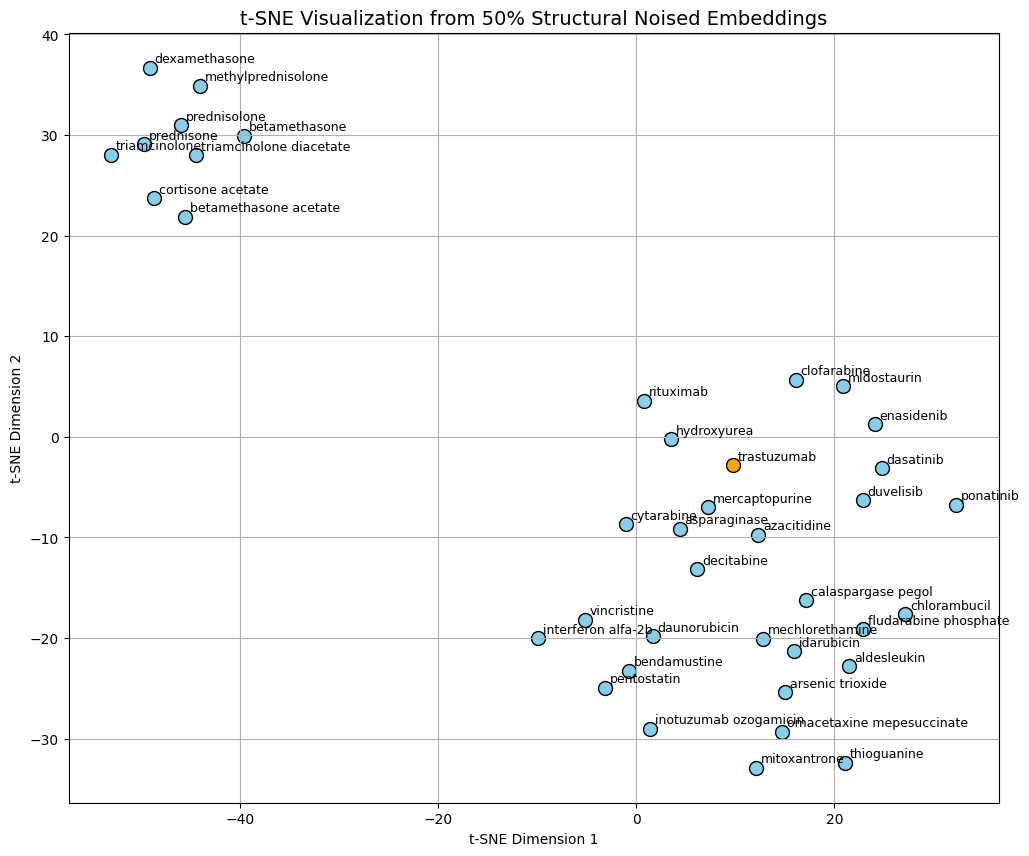

In [ ]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pykeen.triples import TriplesFactory

# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/diffusion_model/50_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]

# --- Create Entity Mapping using PyKEEN ---
triples_factory = TriplesFactory.from_labeled_triples(df.values)
entity_to_id = triples_factory.entity_to_id
id_to_entity = {v: k for k, v in entity_to_id.items()}

# --- Load Embeddings ---
embeddings = np.load("/content/drive/MyDrive/diffusion_model/50_noise/noised_node_embeddings.npy")

# --- Define Target CUIs ---
target_cuis = [  # your full list of CUIs including C0728747
    'C0218986', 'C0052416', 'C0003993', 'C0004475', 'C0525079', 'C0005308', 'C0005310', 'C2699709', 'C0008163', 'C0092777', 'C0056391', 'C0010711', 'C1455147', 'C0011015', 'C0049065', 'C0011777', 'C4079854', 'C4519428', 'C0060483', 'C0020402', 'C0020789', 'C1567130', 'C0021735', 'C0025033', 'C0000618', 'C0025815', 'C0526371', 'C0026259', 'C0062941', 'C0030896', 'C2987417', 'C0032950', 'C0032952', 'C0393022', 'C0039902', 'C0040864', 'C0040867', 'C0042679', 'C0728747'
]

cui_name_pairs = [('C0218986', 'aldesleukin'),
 ('C0052416', 'arsenic trioxide'),
 ('C0003993', 'asparaginase'),
 ('C0004475', 'azacitidine'),
 ('C0525079', 'bendamustine'),
 ('C0005308', 'betamethasone'),
 ('C0005310', 'betamethasone acetate'),
 ('C2699709', 'calaspargase pegol'),
 ('C0008163', 'chlorambucil'),
 ('C0092777', 'clofarabine'),
 ('C0056391', 'cortisone acetate'),
 ('C0010711', 'cytarabine'),
 ('C1455147', 'dasatinib'),
 ('C0011015', 'daunorubicin'),
 ('C0049065', 'decitabine'),
 ('C0011777', 'dexamethasone'),
 ('C4079854', 'duvelisib'),
 ('C4519428', 'enasidenib'),
 ('C0060483', 'fludarabine phosphate'),
 ('C0020402', 'hydroxyurea'),
 ('C0020789', 'idarubicin'),
 ('C1567130', 'inotuzumab ozogamicin'),
 ('C0021735', 'interferon alfa-2b'),
 ('C0025033', 'mechlorethamine'),
 ('C0000618', 'mercaptopurine'),
 ('C0025815', 'methylprednisolone'),
 ('C0526371', 'midostaurin'),
 ('C0026259', 'mitoxantrone'),
 ('C0062941', 'omacetaxine mepesuccinate'),
 ('C0030896', 'pentostatin'),
 ('C2987417', 'ponatinib'),
 ('C0032950', 'prednisolone'),
 ('C0032952', 'prednisone'),
 ('C0393022', 'rituximab'),
 ('C0039902', 'thioguanine'),
 ('C0040864', 'triamcinolone'),
 ('C0040867', 'triamcinolone diacetate'),
 ('C0042679', 'vincristine'),
 ('C0728747', 'trastuzumab')]

cui_to_name = dict(cui_name_pairs)


# --- Get Embeddings for Selected CUIs ---
embedding_vectors = []
label_list = []

for cui in target_cuis:
    if cui in entity_to_id:
        idx = entity_to_id[cui]
        embedding_vectors.append(embeddings[idx])
        label = cui_to_name.get(cui, cui)  # Use name if available
        label_list.append(label)
    else:
        print(f"⚠️ Warning: CUI {cui} not found in entity_to_id.")

embedding_vectors = np.vstack(embedding_vectors)

# --- Apply t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embedding_2d_noised = tsne.fit_transform(embedding_vectors)

# --- Plot t-SNE Result ---
plt.figure(figsize=(12, 10))
for i, label in enumerate(label_list):
    x, y = embedding_2d_noised[i]
    color = 'orange' if label == 'trastuzumab' else 'skyblue'
    plt.scatter(x, y, c=color, s=100, edgecolors='black')
    plt.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.title("t-SNE Visualization from 50% Structural Noised Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


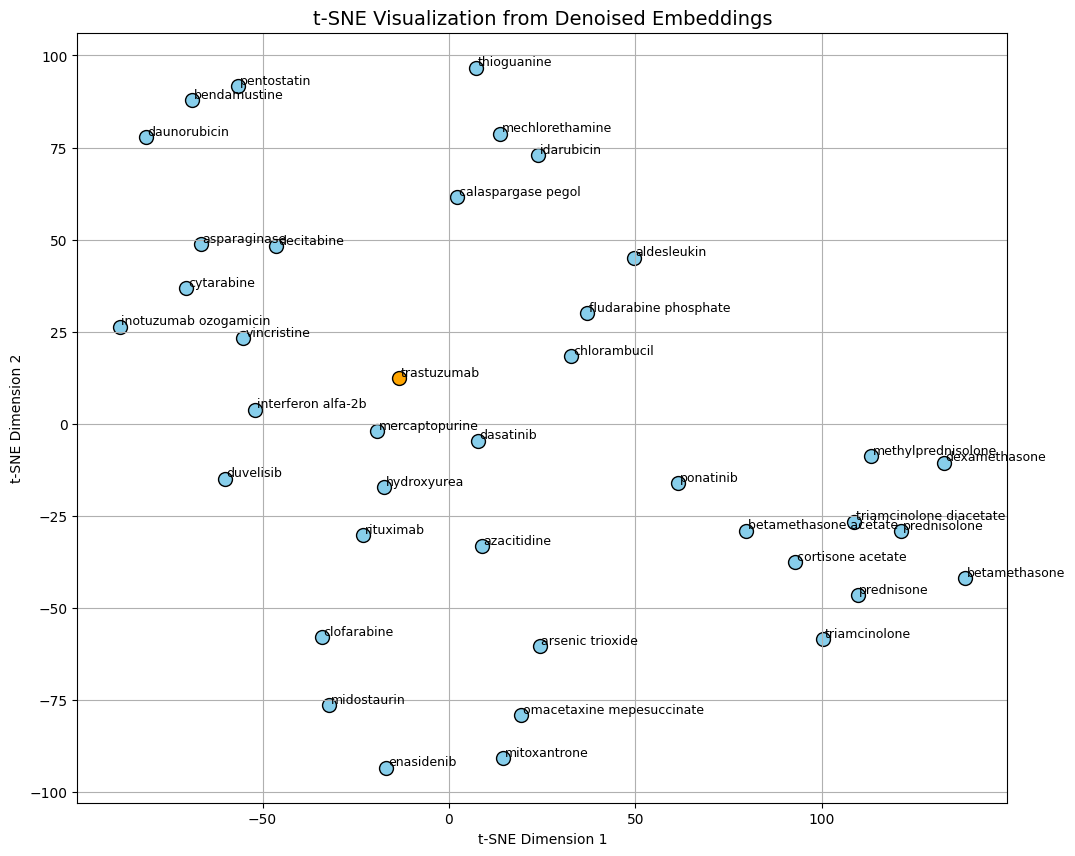

In [ ]:
# --- Install Required Library ---
#!pip install pykeen

# --- Upload Files ---
#from google.colab import files
#uploaded = files.upload()  # Upload both: original_node_embeddings.npy and positive_dataset.csv

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pykeen.triples import TriplesFactory

# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/diffusion_model/50_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]

# --- Create Entity Mapping using PyKEEN ---
triples_factory = TriplesFactory.from_labeled_triples(df.values)
entity_to_id = triples_factory.entity_to_id
id_to_entity = {v: k for k, v in entity_to_id.items()}

# --- Load Embeddings ---
embeddings = np.load("/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy")

# --- Define Target CUIs ---
target_cuis = [  # your full list of CUIs including C0728747
   'C0218986', 'C0052416', 'C0003993', 'C0004475', 'C0525079', 'C0005308', 'C0005310', 'C2699709', 'C0008163', 'C0092777', 'C0056391', 'C0010711', 'C1455147', 'C0011015', 'C0049065', 'C0011777', 'C4079854', 'C4519428', 'C0060483', 'C0020402', 'C0020789', 'C1567130', 'C0021735', 'C0025033', 'C0000618', 'C0025815', 'C0526371', 'C0026259', 'C0062941', 'C0030896', 'C2987417', 'C0032950', 'C0032952', 'C0393022', 'C0039902', 'C0040864', 'C0040867', 'C0042679', 'C0728747'
]

cui_name_pairs = [('C0218986', 'aldesleukin'),
 ('C0052416', 'arsenic trioxide'),
 ('C0003993', 'asparaginase'),
 ('C0004475', 'azacitidine'),
 ('C0525079', 'bendamustine'),
 ('C0005308', 'betamethasone'),
 ('C0005310', 'betamethasone acetate'),
 ('C2699709', 'calaspargase pegol'),
 ('C0008163', 'chlorambucil'),
 ('C0092777', 'clofarabine'),
 ('C0056391', 'cortisone acetate'),
 ('C0010711', 'cytarabine'),
 ('C1455147', 'dasatinib'),
 ('C0011015', 'daunorubicin'),
 ('C0049065', 'decitabine'),
 ('C0011777', 'dexamethasone'),
 ('C4079854', 'duvelisib'),
 ('C4519428', 'enasidenib'),
 ('C0060483', 'fludarabine phosphate'),
 ('C0020402', 'hydroxyurea'),
 ('C0020789', 'idarubicin'),
 ('C1567130', 'inotuzumab ozogamicin'),
 ('C0021735', 'interferon alfa-2b'),
 ('C0025033', 'mechlorethamine'),
 ('C0000618', 'mercaptopurine'),
 ('C0025815', 'methylprednisolone'),
 ('C0526371', 'midostaurin'),
 ('C0026259', 'mitoxantrone'),
 ('C0062941', 'omacetaxine mepesuccinate'),
 ('C0030896', 'pentostatin'),
 ('C2987417', 'ponatinib'),
 ('C0032950', 'prednisolone'),
 ('C0032952', 'prednisone'),
 ('C0393022', 'rituximab'),
 ('C0039902', 'thioguanine'),
 ('C0040864', 'triamcinolone'),
 ('C0040867', 'triamcinolone diacetate'),
 ('C0042679', 'vincristine'),
 ('C0728747', 'trastuzumab')]

cui_to_name = dict(cui_name_pairs)


# --- Get Embeddings for Selected CUIs ---
embedding_vectors = []
label_list = []

for cui in target_cuis:
    if cui in entity_to_id:
        idx = entity_to_id[cui]
        embedding_vectors.append(embeddings[idx])
        label = cui_to_name.get(cui, cui)  # Use name if available
        label_list.append(label)
    else:
        print(f"⚠️ Warning: CUI {cui} not found in entity_to_id.")

embedding_vectors = np.vstack(embedding_vectors)

# --- Apply t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embedding_2d_denoised = tsne.fit_transform(embedding_vectors)

# --- Plot t-SNE Result ---
plt.figure(figsize=(12, 10))
for i, label in enumerate(label_list):
    x, y = embedding_2d_denoised[i]
    color = 'orange' if label == 'trastuzumab' else 'skyblue'
    plt.scatter(x, y, c=color, s=100, edgecolors='black')
    plt.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.title("t-SNE Visualization from Denoised Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Define the CUI labels in the order they appear in your embeddings
label_list = [  # your full list of CUIs including C0728747
    'C0218986', 'C0052416', 'C0003993', 'C0004475', 'C0525079', 'C0005308', 'C0005310', 'C2699709', 'C0008163', 'C0092777', 'C0056391', 'C0010711', 'C1455147', 'C0011015', 'C0049065', 'C0011777', 'C4079854', 'C4519428', 'C0060483', 'C0020402', 'C0020789', 'C1567130', 'C0021735', 'C0025033', 'C0000618', 'C0025815', 'C0526371', 'C0026259', 'C0062941', 'C0030896', 'C2987417', 'C0032950', 'C0032952', 'C0393022', 'C0039902', 'C0040864', 'C0040867', 'C0042679', 'C0728747'
]

cui_name_pairs = [('C0218986', 'aldesleukin'),
 ('C0052416', 'arsenic trioxide'),
 ('C0003993', 'asparaginase'),
 ('C0004475', 'azacitidine'),
 ('C0525079', 'bendamustine'),
 ('C0005308', 'betamethasone'),
 ('C0005310', 'betamethasone acetate'),
 ('C2699709', 'calaspargase pegol'),
 ('C0008163', 'chlorambucil'),
 ('C0092777', 'clofarabine'),
 ('C0056391', 'cortisone acetate'),
 ('C0010711', 'cytarabine'),
 ('C1455147', 'dasatinib'),
 ('C0011015', 'daunorubicin'),
 ('C0049065', 'decitabine'),
 ('C0011777', 'dexamethasone'),
 ('C4079854', 'duvelisib'),
 ('C4519428', 'enasidenib'),
 ('C0060483', 'fludarabine phosphate'),
 ('C0020402', 'hydroxyurea'),
 ('C0020789', 'idarubicin'),
 ('C1567130', 'inotuzumab ozogamicin'),
 ('C0021735', 'interferon alfa-2b'),
 ('C0025033', 'mechlorethamine'),
 ('C0000618', 'mercaptopurine'),
 ('C0025815', 'methylprednisolone'),
 ('C0526371', 'midostaurin'),
 ('C0026259', 'mitoxantrone'),
 ('C0062941', 'omacetaxine mepesuccinate'),
 ('C0030896', 'pentostatin'),
 ('C2987417', 'ponatinib'),
 ('C0032950', 'prednisolone'),
 ('C0032952', 'prednisone'),
 ('C0393022', 'rituximab'),
 ('C0039902', 'thioguanine'),
 ('C0040864', 'triamcinolone'),
 ('C0040867', 'triamcinolone diacetate'),
 ('C0042679', 'vincristine'),
 ('C0728747', 'trastuzumab')]

cui_to_name = dict(cui_name_pairs)

def get_tsne_neighbors(tsne_array, labels, center_cui='C0728747', top_n=38):
    label_to_index = {label: idx for idx, label in enumerate(labels)}
    center_index = label_to_index[center_cui]

    center_point = tsne_array[center_index]

    distances = []
    for i, point in enumerate(tsne_array):
        if i == center_index:
            continue
        dist = np.linalg.norm(center_point - point)
        distances.append((labels[i], dist))

    sorted_neighbors = sorted(distances, key=lambda x: x[1])
    return sorted_neighbors[:top_n]

# Assuming:
# - embedding_2d_original = t-SNE result from original embeddings
# - embedding_2d_denoised = t-SNE result from denoised embeddings

top_k = 38
original_neighbors = get_tsne_neighbors(embedding_2d_original, label_list, 'C0728747', top_k)
noised_neighbors = get_tsne_neighbors(embedding_2d_noised, label_list, 'C0728747', top_k)
denoised_neighbors = get_tsne_neighbors(embedding_2d_denoised, label_list, 'C0728747', top_k)

print("Top t-SNE Neighbors from Original Embeddings:")
for i, (label, dist) in enumerate(original_neighbors, start=1):
    name = cui_to_name.get(label, label)
    print(f"{i}. {name} ({label}): {dist:.2f}")

print("\nTop t-SNE Neighbors from Noised Embeddings:")
for i, (label, dist) in enumerate(noised_neighbors, start=1):
    name = cui_to_name.get(label, label)
    print(f"{i}. {name} ({label}): {dist:.2f}")

print("\nTop t-SNE Neighbors from Denoised Embeddings:")
for i, (label, dist) in enumerate(denoised_neighbors, start=1):
    name = cui_to_name.get(label, label)
    print(f"{i}. {name} ({label}): {dist:.2f}")




Top t-SNE Neighbors from Original Embeddings:
1. aldesleukin (C0218986): 23.24
2. interferon alfa-2b (C0021735): 27.88
3. pentostatin (C0030896): 28.05
4. chlorambucil (C0008163): 40.70
5. idarubicin (C0020789): 56.36
6. hydroxyurea (C0020402): 58.80
7. bendamustine (C0525079): 58.90
8. fludarabine phosphate (C0060483): 64.51
9. cytarabine (C0010711): 73.71
10. duvelisib (C4079854): 78.53
11. thioguanine (C0039902): 82.52
12. decitabine (C0049065): 85.76
13. midostaurin (C0526371): 89.51
14. dasatinib (C1455147): 90.99
15. omacetaxine mepesuccinate (C0062941): 93.11
16. azacitidine (C0004475): 99.97
17. ponatinib (C2987417): 102.59
18. arsenic trioxide (C0052416): 111.29
19. daunorubicin (C0011015): 114.72
20. enasidenib (C4519428): 115.28
21. clofarabine (C0092777): 119.06
22. vincristine (C0042679): 126.23
23. mercaptopurine (C0000618): 133.86
24. mechlorethamine (C0025033): 137.09
25. asparaginase (C0003993): 137.23
26. mitoxantrone (C0026259): 152.94
27. inotuzumab ozogamicin (C156

# Cobimetinib (Melanoma) repositioning Lung Cancer

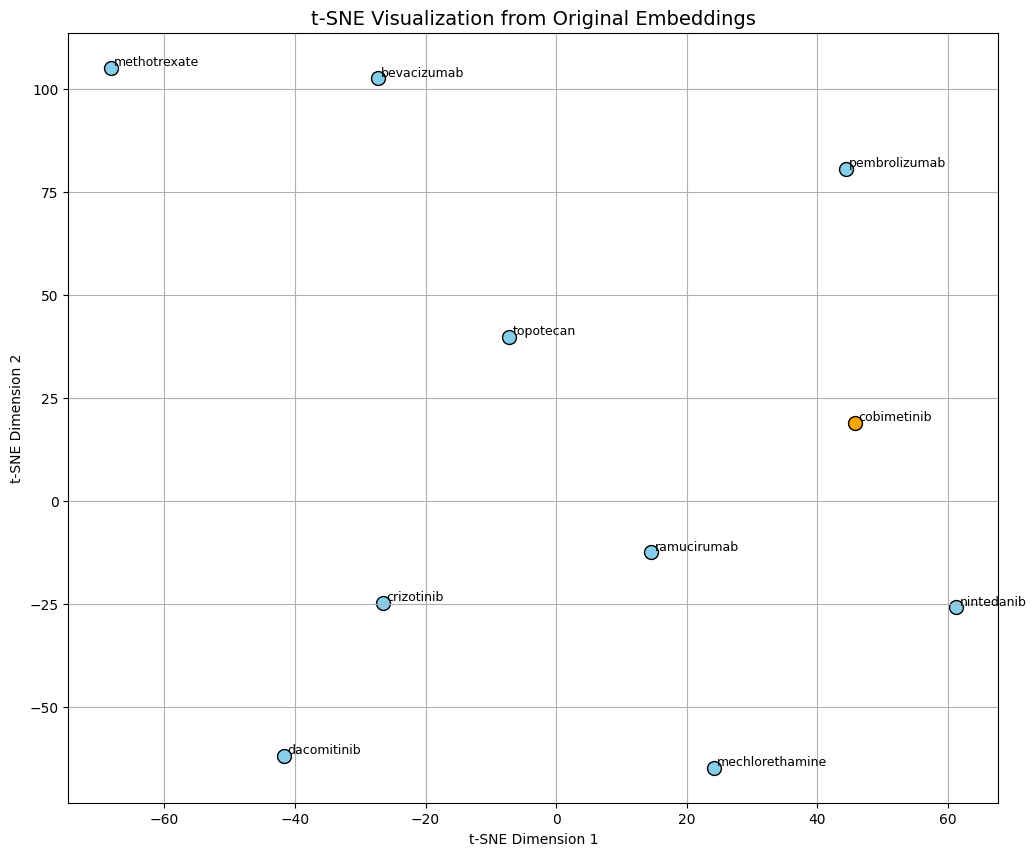

In [ ]:
# --- Install Required Library ---
#!pip install pykeen

# --- Upload Files ---
#from google.colab import files
#uploaded = files.upload()  # Upload both: original_node_embeddings.npy and positive_dataset.csv

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pykeen.triples import TriplesFactory

# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/diffusion_model/positive_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]

# --- Create Entity Mapping using PyKEEN ---
triples_factory = TriplesFactory.from_labeled_triples(df.values)
entity_to_id = triples_factory.entity_to_id
id_to_entity = {v: k for k, v in entity_to_id.items()}

# --- Load Embeddings ---
embeddings = np.load("/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy")

# --- Define Target CUIs ---
target_cuis = [  # your full list of CUIs including C0728747
    'C0025033', 'C0025677', 'C0796392', 'C2974289', 'C2987430', 'C2930789', 'C3658706', 'C2742502', 'C0146224', 'C4049146'
]

cui_name_pairs = [('C0025033', 'mechlorethamine'),
 ('C0025677', 'methotrexate'),
 ('C0796392', 'bevacizumab'),
 ('C2974289', 'crizotinib'),
 ('C2987430', 'dacomitinib'),
 ('C2930789', 'nintedanib'),
 ('C3658706', 'pembrolizumab'),
 ('C2742502', 'ramucirumab'),
 ('C0146224', 'topotecan'),
 ('C4049146', 'cobimetinib')]

cui_to_name = dict(cui_name_pairs)


# --- Get Embeddings and Name Labels ---
embedding_vectors = []
label_list = []

for cui in target_cuis:
    if cui in entity_to_id:
        idx = entity_to_id[cui]
        embedding_vectors.append(embeddings[idx])
        label = cui_to_name.get(cui, cui)  # Use name if available
        label_list.append(label)
    else:
        print(f"⚠️ Warning: CUI {cui} not found in entity_to_id.")

embedding_vectors = np.vstack(embedding_vectors)

# --- Apply t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embedding_2d_original = tsne.fit_transform(embedding_vectors)

# --- Plot t-SNE Result ---
plt.figure(figsize=(12, 10))
for i, label in enumerate(label_list):
    x, y = embedding_2d_original[i]
    color = 'orange' if label == 'cobimetinib' else 'skyblue'
    plt.scatter(x, y, c=color, s=100, edgecolors='black')
    plt.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.title("t-SNE Visualization from Original Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


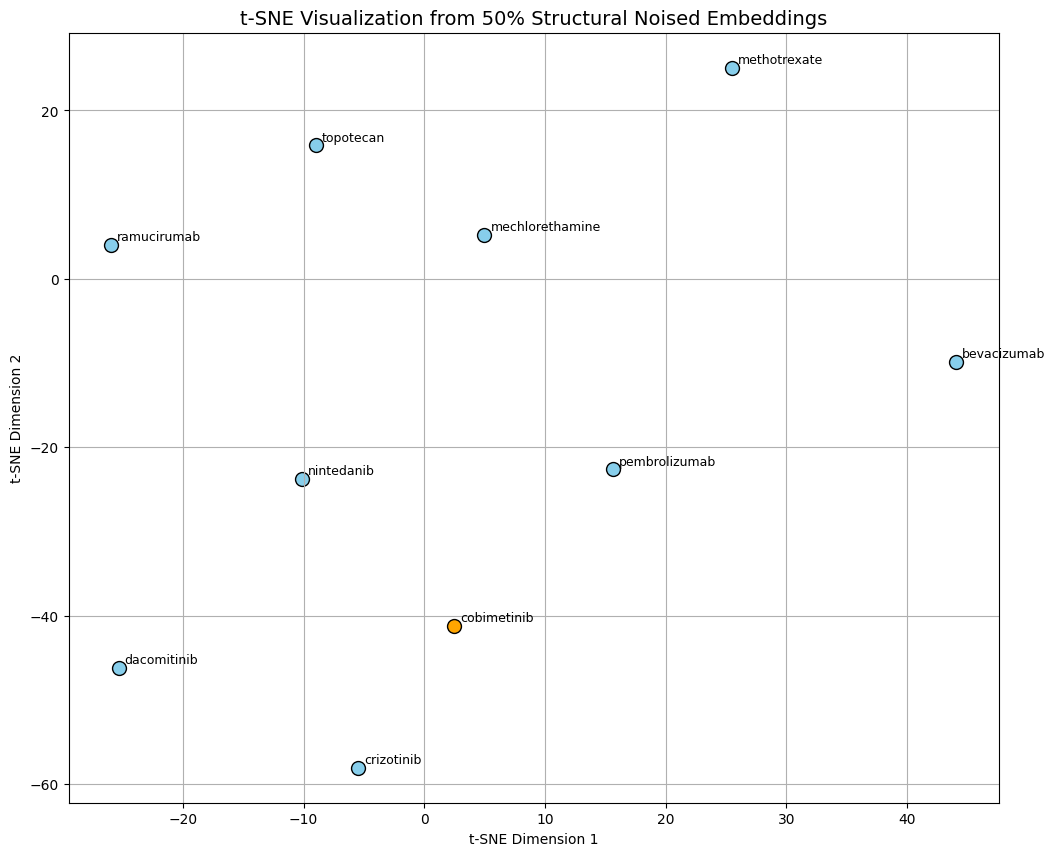

In [ ]:
# --- Install Required Library ---
#!pip install pykeen

# --- Upload Files ---
#from google.colab import files
#uploaded = files.upload()  # Upload both: original_node_embeddings.npy and positive_dataset.csv

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pykeen.triples import TriplesFactory

# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/diffusion_model/50_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]

# --- Create Entity Mapping using PyKEEN ---
triples_factory = TriplesFactory.from_labeled_triples(df.values)
entity_to_id = triples_factory.entity_to_id
id_to_entity = {v: k for k, v in entity_to_id.items()}

# --- Load Embeddings ---
embeddings = np.load("/content/drive/MyDrive/diffusion_model/50_noise/noised_node_embeddings.npy")

# --- Define Target CUIs ---
target_cuis = [  # your full list of CUIs including C0728747
    'C0025033', 'C0025677', 'C0796392', 'C2974289', 'C2987430', 'C2930789', 'C3658706', 'C2742502', 'C0146224', 'C4049146'
]

cui_name_pairs = [('C0025033', 'mechlorethamine'),
 ('C0025677', 'methotrexate'),
 ('C0796392', 'bevacizumab'),
 ('C2974289', 'crizotinib'),
 ('C2987430', 'dacomitinib'),
 ('C2930789', 'nintedanib'),
 ('C3658706', 'pembrolizumab'),
 ('C2742502', 'ramucirumab'),
 ('C0146224', 'topotecan'),
 ('C4049146', 'cobimetinib')]

cui_to_name = dict(cui_name_pairs)


# --- Get Embeddings for Selected CUIs ---
embedding_vectors = []
label_list = []

for cui in target_cuis:
    if cui in entity_to_id:
        idx = entity_to_id[cui]
        embedding_vectors.append(embeddings[idx])
        label = cui_to_name.get(cui, cui)  # Use name if available
        label_list.append(label)
    else:
        print(f"⚠️ Warning: CUI {cui} not found in entity_to_id.")

embedding_vectors = np.vstack(embedding_vectors)

# --- Apply t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embedding_2d_noised = tsne.fit_transform(embedding_vectors)

# --- Plot t-SNE Result ---
plt.figure(figsize=(12, 10))
for i, label in enumerate(label_list):
    x, y = embedding_2d_noised[i]
    color = 'orange' if label == 'cobimetinib' else 'skyblue'
    plt.scatter(x, y, c=color, s=100, edgecolors='black')
    plt.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.title("t-SNE Visualization from 50% Structural Noised Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


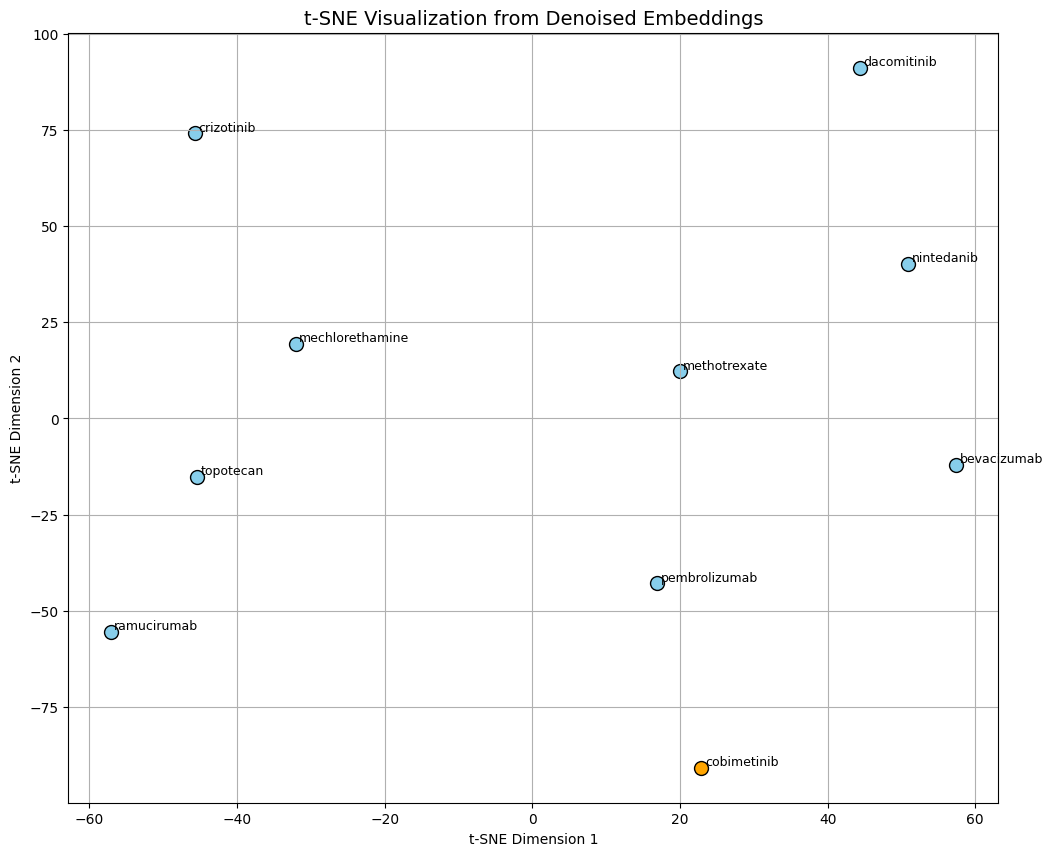

In [ ]:
# --- Install Required Library ---
#!pip install pykeen

# --- Upload Files ---
#from google.colab import files
#uploaded = files.upload()  # Upload both: original_node_embeddings.npy and positive_dataset.csv

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pykeen.triples import TriplesFactory

# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/diffusion_model/50_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]

# --- Create Entity Mapping using PyKEEN ---
triples_factory = TriplesFactory.from_labeled_triples(df.values)
entity_to_id = triples_factory.entity_to_id
id_to_entity = {v: k for k, v in entity_to_id.items()}

# --- Load Embeddings ---
embeddings = np.load("/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy")

# --- Define Target CUIs ---
target_cuis = [  # your full list of CUIs including C0728747
    'C0025033', 'C0025677', 'C0796392', 'C2974289', 'C2987430', 'C2930789', 'C3658706', 'C2742502', 'C0146224', 'C4049146'
]

cui_name_pairs = [('C0025033', 'mechlorethamine'),
 ('C0025677', 'methotrexate'),
 ('C0796392', 'bevacizumab'),
 ('C2974289', 'crizotinib'),
 ('C2987430', 'dacomitinib'),
 ('C2930789', 'nintedanib'),
 ('C3658706', 'pembrolizumab'),
 ('C2742502', 'ramucirumab'),
 ('C0146224', 'topotecan'),
 ('C4049146', 'cobimetinib')]

cui_to_name = dict(cui_name_pairs)


# --- Get Embeddings for Selected CUIs ---
embedding_vectors = []
label_list = []

for cui in target_cuis:
    if cui in entity_to_id:
        idx = entity_to_id[cui]
        embedding_vectors.append(embeddings[idx])
        label = cui_to_name.get(cui, cui)  # Use name if available
        label_list.append(label)
    else:
        print(f"⚠️ Warning: CUI {cui} not found in entity_to_id.")

embedding_vectors = np.vstack(embedding_vectors)

# --- Apply t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embedding_2d_denoised = tsne.fit_transform(embedding_vectors)

# --- Plot t-SNE Result ---
plt.figure(figsize=(12, 10))
for i, label in enumerate(label_list):
    x, y = embedding_2d_denoised[i]
    color = 'orange' if label == 'cobimetinib' else 'skyblue'
    plt.scatter(x, y, c=color, s=100, edgecolors='black')
    plt.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.title("t-SNE Visualization from Denoised Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Define the CUI labels in the order they appear in your embeddings
label_list = [  # your full list of CUIs including C0728747
    'C0025033', 'C0025677', 'C0796392', 'C2974289', 'C2987430', 'C2930789', 'C3658706', 'C2742502', 'C0146224', 'C4049146'
]

cui_name_pairs = [('C0025033', 'mechlorethamine'),
 ('C0025677', 'methotrexate'),
 ('C0796392', 'bevacizumab'),
 ('C2974289', 'crizotinib'),
 ('C2987430', 'dacomitinib'),
 ('C2930789', 'nintedanib'),
 ('C3658706', 'pembrolizumab'),
 ('C2742502', 'ramucirumab'),
 ('C0146224', 'topotecan'),
 ('C4049146', 'cobimetinib')]

cui_to_name = dict(cui_name_pairs)

def get_tsne_neighbors(tsne_array, labels, center_cui='C4049146', top_n=9):
    label_to_index = {label: idx for idx, label in enumerate(labels)}
    center_index = label_to_index[center_cui]

    center_point = tsne_array[center_index]

    distances = []
    for i, point in enumerate(tsne_array):
        if i == center_index:
            continue
        dist = np.linalg.norm(center_point - point)
        distances.append((labels[i], dist))

    sorted_neighbors = sorted(distances, key=lambda x: x[1])
    return sorted_neighbors[:top_n]

# Assuming:
# - embedding_2d_original = t-SNE result from original embeddings
# - embedding_2d_denoised = t-SNE result from denoised embeddings

top_k = 9
original_neighbors = get_tsne_neighbors(embedding_2d_original, label_list, 'C4049146', top_k)
noised_neighbors = get_tsne_neighbors(embedding_2d_noised, label_list, 'C4049146', top_k)
denoised_neighbors = get_tsne_neighbors(embedding_2d_denoised, label_list, 'C4049146', top_k)

print("Top t-SNE Neighbors from Original Embeddings:")
for i, (label, dist) in enumerate(original_neighbors, start=1):
    name = cui_to_name.get(label, label)
    print(f"{i}. {name} ({label}): {dist:.2f}")

print("\nTop t-SNE Neighbors from Noised Embeddings:")
for i, (label, dist) in enumerate(noised_neighbors, start=1):
    name = cui_to_name.get(label, label)
    print(f"{i}. {name} ({label}): {dist:.2f}")

print("\nTop t-SNE Neighbors from Denoised Embeddings:")
for i, (label, dist) in enumerate(denoised_neighbors, start=1):
    name = cui_to_name.get(label, label)
    print(f"{i}. {name} ({label}): {dist:.2f}")




Top t-SNE Neighbors from Original Embeddings:
1. ramucirumab (C2742502): 44.30
2. nintedanib (C2930789): 47.47
3. topotecan (C0146224): 56.92
4. pembrolizumab (C3658706): 61.62
5. crizotinib (C2974289): 84.50
6. mechlorethamine (C0025033): 86.52
7. bevacizumab (C0796392): 111.08
8. dacomitinib (C2987430): 119.13
9. methotrexate (C0025677): 142.90

Top t-SNE Neighbors from Noised Embeddings:
1. crizotinib (C2974289): 18.63
2. nintedanib (C2930789): 21.52
3. pembrolizumab (C3658706): 22.77
4. dacomitinib (C2987430): 28.24
5. mechlorethamine (C0025033): 46.47
6. bevacizumab (C0796392): 52.09
7. ramucirumab (C2742502): 53.44
8. topotecan (C0146224): 58.18
9. methotrexate (C0025677): 70.15

Top t-SNE Neighbors from Denoised Embeddings:
1. pembrolizumab (C3658706): 48.37
2. bevacizumab (C0796392): 86.00
3. ramucirumab (C2742502): 87.48
4. topotecan (C0146224): 102.01
5. methotrexate (C0025677): 103.07
6. mechlorethamine (C0025033): 123.22
7. nintedanib (C2930789): 133.97
8. crizotinib (C2974

# **MODEL COMPARISON**

**Oxaliplatin**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from pykeen.triples import TriplesFactory

# Load knowledge graph and mapping
kg_df = pd.read_csv("/content/drive/MyDrive/diffusion_model/40_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]
triples_factory = TriplesFactory.from_labeled_triples(kg_df.values)
entity_to_id = triples_factory.entity_to_id

# Define inputs
core_subset_cuis = [
    'C0525079', 'C0005308', 'C0005310', 'C0008163', 'C0056391', 'C0011777',
    'C4079854', 'C3501358', 'C0025033', 'C0025815', 'C0032950', 'C0032952',
    'C0393022', 'C0040864', 'C0040867', 'C0042679', 'C4078312', 'C0051556',
    'C1948068', 'C0750848', 'C0005740', 'C1176309', 'C2932486', 'C0055900',
    'C0010583', 'C0011705', 'C0057992', 'C0016374', 'C0016294', 'C0016298',
    'C0018513', 'C1144149', 'C2987603', 'C0066700', 'C1527027', 'C1707080', 'C0042670'
]
matched_disease_drugs = ['C0393022', 'C0010583', 'C0011777']
candidate_cui = 'C0069717'

# Paths to models
model_paths = {
    "original": "/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy",
    "30_noise": "/content/drive/MyDrive/diffusion_model/30_noise/denoised_node_embeddings.npy",
    "40_noise": "/content/drive/MyDrive/diffusion_model/40_noise/denoised_node_embeddings.npy",
    "50_noise": "/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy",
    "60_noise": "/content/drive/MyDrive/diffusion_model/60_noise/denoised_node_embeddings.npy",
    "70_noise": "/content/drive/MyDrive/diffusion_model/70_noise/denoised_node_embeddings.npy",
    "g_noise": "/content/drive/MyDrive/diffusion_model/g_noise/denoised_node_embeddings.npy",
}

# Evaluation function
def evaluate_candidate_against_matched_subset(candidate_cui, matched_cuis, cluster_cuis, embeddings, entity_to_id):
    cluster_vectors = []
    labels = []

    for cui in cluster_cuis:
        if cui in entity_to_id:
            cluster_vectors.append(embeddings[entity_to_id[cui]])
            labels.append(1 if cui in matched_cuis else 0)

    if candidate_cui not in entity_to_id:
        return None  # Skip if candidate not found

    candidate_vector = embeddings[entity_to_id[candidate_cui]]
    cluster_vectors.append(candidate_vector)
    labels.append(2)

    cluster_vectors = np.vstack(cluster_vectors)

    matched_vecs = [embeddings[entity_to_id[cui]] for cui in matched_cuis if cui in entity_to_id]
    matched_vecs = np.vstack(matched_vecs)
    candidate_to_matched = cdist(candidate_vector.reshape(1, -1), matched_vecs)
    candidate_matched_mean = np.mean(candidate_to_matched)

    full_cluster_vecs = [embeddings[entity_to_id[cui]] for cui in cluster_cuis if cui in entity_to_id]
    full_cluster_vecs = np.vstack(full_cluster_vecs)
    candidate_to_all = cdist(candidate_vector.reshape(1, -1), full_cluster_vecs)
    candidate_all_mean = np.mean(candidate_to_all)

    match_ratio = candidate_matched_mean / candidate_all_mean
    sil_score = silhouette_score(cluster_vectors, labels)
    db_index = davies_bouldin_score(cluster_vectors, labels)

    return {
        "Silhouette Score": sil_score,
        "Davies-Bouldin Index": db_index,
        "Candidate-to-Matched Mean Distance": candidate_matched_mean,
        "Candidate-to-All-37 Mean Distance": candidate_all_mean,
        "Relative Match Distance Ratio": match_ratio
    }

# Run evaluation across models
all_results = {}
for model_name, path in model_paths.items():
    embeddings = np.load(path)
    results = evaluate_candidate_against_matched_subset(
        candidate_cui,
        matched_disease_drugs,
        core_subset_cuis,
        embeddings,
        entity_to_id
    )
    if results:
        all_results[model_name] = results

# Create DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(3)
print(results_df)



                                    original  30_noise  40_noise  50_noise  \
Silhouette Score                       0.115    -0.033    -0.030    -0.038   
Davies-Bouldin Index                   1.145     1.758     1.993     1.814   
Candidate-to-Matched Mean Distance     9.872     1.035     0.993     1.013   
Candidate-to-All-37 Mean Distance      8.419     1.206     1.236     1.140   
Relative Match Distance Ratio          1.173     0.858     0.803     0.889   

                                    60_noise  70_noise  g_noise  
Silhouette Score                      -0.044    -0.032   -0.070  
Davies-Bouldin Index                   1.731     1.945    2.761  
Candidate-to-Matched Mean Distance     0.981     1.047    0.781  
Candidate-to-All-37 Mean Distance      1.172     1.207    0.773  
Relative Match Distance Ratio          0.837     0.868    1.010  


**Bortezomib**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from pykeen.triples import TriplesFactory

# Load knowledge graph and mapping
kg_df = pd.read_csv("/content/drive/MyDrive/diffusion_model/40_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]
triples_factory = TriplesFactory.from_labeled_triples(kg_df.values)
entity_to_id = triples_factory.entity_to_id

# Define inputs
core_subset_cuis = ['C0010583', 'C0042670', 'C4055478', 'C0002555', 'C0290883', 'C4055433', 'C0796392', 'C0851344', 'C0048306', 'C1506770', 'C0065879', 'C2713008', 'C3853822', 'C4045494', 'C4726799', 'C0039286', 'C0076181', 'C0039607', 'C0728747', 'C2935436']
matched_disease_drugs = ['C0010583', 'C0796392', 'C0728747']
candidate_cui = 'C1176309'

# Paths to models
model_paths = {
    "original": "/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy",
    "30_noise": "/content/drive/MyDrive/diffusion_model/30_noise/denoised_node_embeddings.npy",
    "40_noise": "/content/drive/MyDrive/diffusion_model/40_noise/denoised_node_embeddings.npy",
    "50_noise": "/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy",
    "60_noise": "/content/drive/MyDrive/diffusion_model/60_noise/denoised_node_embeddings.npy",
    "70_noise": "/content/drive/MyDrive/diffusion_model/70_noise/denoised_node_embeddings.npy",
    "g_noise": "/content/drive/MyDrive/diffusion_model/g_noise/denoised_node_embeddings.npy",
}

# Evaluation function
def evaluate_candidate_against_matched_subset(candidate_cui, matched_cuis, cluster_cuis, embeddings, entity_to_id):
    cluster_vectors = []
    labels = []

    for cui in cluster_cuis:
        if cui in entity_to_id:
            cluster_vectors.append(embeddings[entity_to_id[cui]])
            labels.append(1 if cui in matched_cuis else 0)

    if candidate_cui not in entity_to_id:
        return None  # Skip if candidate not found

    candidate_vector = embeddings[entity_to_id[candidate_cui]]
    cluster_vectors.append(candidate_vector)
    labels.append(2)

    cluster_vectors = np.vstack(cluster_vectors)

    matched_vecs = [embeddings[entity_to_id[cui]] for cui in matched_cuis if cui in entity_to_id]
    matched_vecs = np.vstack(matched_vecs)
    candidate_to_matched = cdist(candidate_vector.reshape(1, -1), matched_vecs)
    candidate_matched_mean = np.mean(candidate_to_matched)

    full_cluster_vecs = [embeddings[entity_to_id[cui]] for cui in cluster_cuis if cui in entity_to_id]
    full_cluster_vecs = np.vstack(full_cluster_vecs)
    candidate_to_all = cdist(candidate_vector.reshape(1, -1), full_cluster_vecs)
    candidate_all_mean = np.mean(candidate_to_all)

    match_ratio = candidate_matched_mean / candidate_all_mean
    sil_score = silhouette_score(cluster_vectors, labels)
    db_index = davies_bouldin_score(cluster_vectors, labels)

    return {
        "Silhouette Score": sil_score,
        "Davies-Bouldin Index": db_index,
        "Candidate-to-Matched Mean Distance": candidate_matched_mean,
        "Candidate-to-All Mean Distance": candidate_all_mean,
        "Relative Match Distance Ratio": match_ratio
    }

# Run evaluation across models
all_results = {}
for model_name, path in model_paths.items():
    embeddings = np.load(path)
    results = evaluate_candidate_against_matched_subset(
        candidate_cui,
        matched_disease_drugs,
        core_subset_cuis,
        embeddings,
        entity_to_id
    )
    if results:
        all_results[model_name] = results

# Create DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(3)
print(results_df)



                                    original  30_noise  40_noise  50_noise  \
Silhouette Score                       0.066    -0.034    -0.044    -0.051   
Davies-Bouldin Index                   1.210     1.559     1.914     1.999   
Candidate-to-Matched Mean Distance     7.410     0.867     0.997     1.126   
Candidate-to-All Mean Distance         6.762     1.078     1.151     1.233   
Relative Match Distance Ratio          1.096     0.805     0.866     0.913   

                                    60_noise  70_noise  g_noise  
Silhouette Score                      -0.022    -0.078   -0.021  
Davies-Bouldin Index                   1.821     1.800    1.998  
Candidate-to-Matched Mean Distance     1.022     0.897    0.802  
Candidate-to-All Mean Distance         1.222     1.113    0.862  
Relative Match Distance Ratio          0.836     0.806    0.931  


**Nintedanib**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from pykeen.triples import TriplesFactory

# Load knowledge graph and mapping
kg_df = pd.read_csv("/content/drive/MyDrive/diffusion_model/40_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]
triples_factory = TriplesFactory.from_labeled_triples(kg_df.values)
entity_to_id = triples_factory.entity_to_id

# Define inputs
core_subset_cuis = ['C0218986', 'C0052416', 'C0003993', 'C0004475', 'C0525079', 'C0005308', 'C2699709', 'C0008163', 'C0092777', 'C0056391', 'C0010711', 'C1455147', 'C0011015', 'C0049065', 'C0011777', 'C4079854', 'C4519428', 'C0060483', 'C1533699', 'C0770560', 'C0020402', 'C3501358', 'C0020789', 'C1567130', 'C0021735', 'C0025033', 'C0000618', 'C0025677', 'C0025815', 'C0526371', 'C0026259', 'C0062941', 'C0030896', 'C0032950', 'C0032952', 'C0393022', 'C0039512', 'C0039902', 'C0040864', 'C0040867', 'C0042679']
matched_disease_drugs = ['C0393022', 'C0032952', 'C0025677']
candidate_cui = 'C2930789'

# Paths to models
model_paths = {
    "original": "/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy",
    "30_noise": "/content/drive/MyDrive/diffusion_model/30_noise/denoised_node_embeddings.npy",
    "40_noise": "/content/drive/MyDrive/diffusion_model/40_noise/denoised_node_embeddings.npy",
    "50_noise": "/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy",
    "60_noise": "/content/drive/MyDrive/diffusion_model/60_noise/denoised_node_embeddings.npy",
    "70_noise": "/content/drive/MyDrive/diffusion_model/70_noise/denoised_node_embeddings.npy",
    "g_noise": "/content/drive/MyDrive/diffusion_model/g_noise/denoised_node_embeddings.npy",
}

# Evaluation function
def evaluate_candidate_against_matched_subset(candidate_cui, matched_cuis, cluster_cuis, embeddings, entity_to_id):
    cluster_vectors = []
    labels = []

    for cui in cluster_cuis:
        if cui in entity_to_id:
            cluster_vectors.append(embeddings[entity_to_id[cui]])
            labels.append(1 if cui in matched_cuis else 0)

    if candidate_cui not in entity_to_id:
        return None  # Skip if candidate not found

    candidate_vector = embeddings[entity_to_id[candidate_cui]]
    cluster_vectors.append(candidate_vector)
    labels.append(2)

    cluster_vectors = np.vstack(cluster_vectors)

    matched_vecs = [embeddings[entity_to_id[cui]] for cui in matched_cuis if cui in entity_to_id]
    matched_vecs = np.vstack(matched_vecs)
    candidate_to_matched = cdist(candidate_vector.reshape(1, -1), matched_vecs)
    candidate_matched_mean = np.mean(candidate_to_matched)

    full_cluster_vecs = [embeddings[entity_to_id[cui]] for cui in cluster_cuis if cui in entity_to_id]
    full_cluster_vecs = np.vstack(full_cluster_vecs)
    candidate_to_all = cdist(candidate_vector.reshape(1, -1), full_cluster_vecs)
    candidate_all_mean = np.mean(candidate_to_all)

    match_ratio = candidate_matched_mean / candidate_all_mean
    sil_score = silhouette_score(cluster_vectors, labels)
    db_index = davies_bouldin_score(cluster_vectors, labels)

    return {
        "Silhouette Score": sil_score,
        "Davies-Bouldin Index": db_index,
        "Candidate-to-Matched Mean Distance": candidate_matched_mean,
        "Candidate-to-All Mean Distance": candidate_all_mean,
        "Relative Match Distance Ratio": match_ratio
    }

# Run evaluation across models
all_results = {}
for model_name, path in model_paths.items():
    embeddings = np.load(path)
    results = evaluate_candidate_against_matched_subset(
        candidate_cui,
        matched_disease_drugs,
        core_subset_cuis,
        embeddings,
        entity_to_id
    )
    if results:
        all_results[model_name] = results

# Create DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(3)
print(results_df)



                                    original  30_noise  40_noise  50_noise  \
Silhouette Score                      -0.019    -0.053    -0.061    -0.091   
Davies-Bouldin Index                   1.361     2.118     2.000     2.203   
Candidate-to-Matched Mean Distance    10.381     1.038     1.159     1.061   
Candidate-to-All Mean Distance         7.775     1.081     1.174     1.166   
Relative Match Distance Ratio          1.335     0.960     0.987     0.910   

                                    60_noise  70_noise  g_noise  
Silhouette Score                      -0.050    -0.056    0.068  
Davies-Bouldin Index                   2.045     2.446    1.855  
Candidate-to-Matched Mean Distance     1.135     1.114    1.045  
Candidate-to-All Mean Distance         1.250     1.204    0.973  
Relative Match Distance Ratio          0.908     0.925    1.074  


**flumethasone**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from pykeen.triples import TriplesFactory

# Load knowledge graph and mapping
kg_df = pd.read_csv("/content/drive/MyDrive/diffusion_model/40_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]
triples_factory = TriplesFactory.from_labeled_triples(kg_df.values)
entity_to_id = triples_factory.entity_to_id

# Define inputs
core_subset_cuis = ['C0025677', 'C0042670', 'C4055478', 'C0002555', 'C0290883', 'C4055433', 'C0796392', 'C0571665', 'C0851344', 'C0048306', 'C1135132', 'C1506770', 'C0065879', 'C0025826', 'C2713008', 'C3853822', 'C1328025', 'C4045494', 'C4726799', 'C0039286', 'C0076181', 'C0039607', 'C0728747', 'C2935436']
matched_disease_drugs = ['C0002555', 'C2713008', 'C0728747', 'C0076181', 'C0039286', 'C4726799', 'C4045494', 'C1328025', 'C3853822', 'C4055478', 'C0290883', 'C0042670', 'C1506770', 'C1135132', 'C0048306', 'C0851344', 'C0571665', 'C0796392', 'C2935436']
candidate_cui = 'C0016294'

# Paths to models
model_paths = {
    "original": "/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy",
    "30_noise": "/content/drive/MyDrive/diffusion_model/30_noise/denoised_node_embeddings.npy",
    "40_noise": "/content/drive/MyDrive/diffusion_model/40_noise/denoised_node_embeddings.npy",
    "50_noise": "/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy",
    "60_noise": "/content/drive/MyDrive/diffusion_model/60_noise/denoised_node_embeddings.npy",
    "70_noise": "/content/drive/MyDrive/diffusion_model/70_noise/denoised_node_embeddings.npy",
    "g_noise": "/content/drive/MyDrive/diffusion_model/g_noise/denoised_node_embeddings.npy",
}

# Evaluation function
def evaluate_candidate_against_matched_subset(candidate_cui, matched_cuis, cluster_cuis, embeddings, entity_to_id):
    cluster_vectors = []
    labels = []

    for cui in cluster_cuis:
        if cui in entity_to_id:
            cluster_vectors.append(embeddings[entity_to_id[cui]])
            labels.append(1 if cui in matched_cuis else 0)

    if candidate_cui not in entity_to_id:
        return None  # Skip if candidate not found

    candidate_vector = embeddings[entity_to_id[candidate_cui]]
    cluster_vectors.append(candidate_vector)
    labels.append(2)

    cluster_vectors = np.vstack(cluster_vectors)

    matched_vecs = [embeddings[entity_to_id[cui]] for cui in matched_cuis if cui in entity_to_id]
    matched_vecs = np.vstack(matched_vecs)
    candidate_to_matched = cdist(candidate_vector.reshape(1, -1), matched_vecs)
    candidate_matched_mean = np.mean(candidate_to_matched)

    full_cluster_vecs = [embeddings[entity_to_id[cui]] for cui in cluster_cuis if cui in entity_to_id]
    full_cluster_vecs = np.vstack(full_cluster_vecs)
    candidate_to_all = cdist(candidate_vector.reshape(1, -1), full_cluster_vecs)
    candidate_all_mean = np.mean(candidate_to_all)

    match_ratio = candidate_matched_mean / candidate_all_mean
    sil_score = silhouette_score(cluster_vectors, labels)
    db_index = davies_bouldin_score(cluster_vectors, labels)

    return {
        "Silhouette Score": sil_score,
        "Davies-Bouldin Index": db_index,
        "Candidate-to-Matched Mean Distance": candidate_matched_mean,
        "Candidate-to-All Mean Distance": candidate_all_mean,
        "Relative Match Distance Ratio": match_ratio
    }

# Run evaluation across models
all_results = {}
for model_name, path in model_paths.items():
    embeddings = np.load(path)
    results = evaluate_candidate_against_matched_subset(
        candidate_cui,
        matched_disease_drugs,
        core_subset_cuis,
        embeddings,
        entity_to_id
    )
    if results:
        all_results[model_name] = results

# Create DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(3)
print(results_df)



                                    original  30_noise  40_noise  50_noise  \
Silhouette Score                       0.092    -0.011    -0.079    -0.027   
Davies-Bouldin Index                   2.740     2.703     3.315     2.564   
Candidate-to-Matched Mean Distance     9.108     1.350     1.143     1.216   
Candidate-to-All Mean Distance         9.159     1.330     1.116     1.213   
Relative Match Distance Ratio          0.994     1.015     1.024     1.003   

                                    60_noise  70_noise  g_noise  
Silhouette Score                      -0.051    -0.045    0.003  
Davies-Bouldin Index                   3.121     2.744    2.485  
Candidate-to-Matched Mean Distance     1.254     1.210    0.807  
Candidate-to-All Mean Distance         1.242     1.202    0.824  
Relative Match Distance Ratio          1.009     1.006    0.979  


**blinatumomab**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from pykeen.triples import TriplesFactory

# Load knowledge graph and mapping
kg_df = pd.read_csv("/content/drive/MyDrive/diffusion_model/40_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]
triples_factory = TriplesFactory.from_labeled_triples(kg_df.values)
entity_to_id = triples_factory.entity_to_id

# Define inputs
core_subset_cuis = ['C0218986', 'C1700874', 'C0026256', 'C1831796', 'C0072980', 'C1516119']
matched_disease_drugs = ['C0218986',
'C0026256',
'C1831796']
candidate_cui = 'C3853839'

# Paths to models
model_paths = {
    "original": "/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy",
    "30_noise": "/content/drive/MyDrive/diffusion_model/30_noise/denoised_node_embeddings.npy",
    "40_noise": "/content/drive/MyDrive/diffusion_model/40_noise/denoised_node_embeddings.npy",
    "50_noise": "/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy",
    "60_noise": "/content/drive/MyDrive/diffusion_model/60_noise/denoised_node_embeddings.npy",
    "70_noise": "/content/drive/MyDrive/diffusion_model/70_noise/denoised_node_embeddings.npy",
    "g_noise": "/content/drive/MyDrive/diffusion_model/g_noise/denoised_node_embeddings.npy",
}

# Evaluation function
def evaluate_candidate_against_matched_subset(candidate_cui, matched_cuis, cluster_cuis, embeddings, entity_to_id):
    cluster_vectors = []
    labels = []

    for cui in cluster_cuis:
        if cui in entity_to_id:
            cluster_vectors.append(embeddings[entity_to_id[cui]])
            labels.append(1 if cui in matched_cuis else 0)

    if candidate_cui not in entity_to_id:
        return None  # Skip if candidate not found

    candidate_vector = embeddings[entity_to_id[candidate_cui]]
    cluster_vectors.append(candidate_vector)
    labels.append(2)

    cluster_vectors = np.vstack(cluster_vectors)

    matched_vecs = [embeddings[entity_to_id[cui]] for cui in matched_cuis if cui in entity_to_id]
    matched_vecs = np.vstack(matched_vecs)
    candidate_to_matched = cdist(candidate_vector.reshape(1, -1), matched_vecs)
    candidate_matched_mean = np.mean(candidate_to_matched)

    full_cluster_vecs = [embeddings[entity_to_id[cui]] for cui in cluster_cuis if cui in entity_to_id]
    full_cluster_vecs = np.vstack(full_cluster_vecs)
    candidate_to_all = cdist(candidate_vector.reshape(1, -1), full_cluster_vecs)
    candidate_all_mean = np.mean(candidate_to_all)

    match_ratio = candidate_matched_mean / candidate_all_mean
    sil_score = silhouette_score(cluster_vectors, labels)
    db_index = davies_bouldin_score(cluster_vectors, labels)

    return {
        "Silhouette Score": sil_score,
        "Davies-Bouldin Index": db_index,
        "Candidate-to-Matched Mean Distance": candidate_matched_mean,
        "Candidate-to-All Mean Distance": candidate_all_mean,
        "Relative Match Distance Ratio": match_ratio
    }

# Run evaluation across models
all_results = {}
for model_name, path in model_paths.items():
    embeddings = np.load(path)
    results = evaluate_candidate_against_matched_subset(
        candidate_cui,
        matched_disease_drugs,
        core_subset_cuis,
        embeddings,
        entity_to_id
    )
    if results:
        all_results[model_name] = results

# Create DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(3)
print(results_df)



                                    original  30_noise  40_noise  50_noise  \
Silhouette Score                      -0.016     0.027    -0.027    -0.035   
Davies-Bouldin Index                   1.554     1.376     1.736     1.881   
Candidate-to-Matched Mean Distance     6.714     1.045     1.223     1.351   
Candidate-to-All Mean Distance         7.195     1.135     1.253     1.285   
Relative Match Distance Ratio          0.933     0.921     0.976     1.051   

                                    60_noise  70_noise  g_noise  
Silhouette Score                       0.008    -0.013    0.006  
Davies-Bouldin Index                   1.371     1.474    1.443  
Candidate-to-Matched Mean Distance     1.275     1.188    0.876  
Candidate-to-All Mean Distance         1.278     1.180    0.843  
Relative Match Distance Ratio          0.998     1.007    1.039  


**osimertinib**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from pykeen.triples import TriplesFactory

# Load knowledge graph and mapping
kg_df = pd.read_csv("/content/drive/MyDrive/diffusion_model/40_noise/noised_dataset.csv")[['SUBJECT_CUI', 'PREDICATE', 'OBJECT_CUI']]
triples_factory = TriplesFactory.from_labeled_triples(kg_df.values)
entity_to_id = triples_factory.entity_to_id

# Define inputs
core_subset_cuis = ['C0525079', 'C0008163', 'C4079854', 'C0025033', 'C0025677', 'C0025815', 'C0032950', 'C0032952', 'C0393022', 'C0040864', 'C0040867', 'C0042679', 'C0051556', 'C1948068', 'C0750848', 'C2932486', 'C0055900', 'C0011705', 'C0057992', 'C0016294', 'C0016298', 'C0117996', 'C0877880', 'C1144149', 'C2987603']
matched_disease_drugs = ['C0525079', 'C0011705', 'C0877880', 'C0117996', 'C0016298', 'C0016294', 'C0057992', 'C0051556', 'C0055900', 'C2932486', 'C0750848', 'C1948068', 'C0008163', 'C0040867', 'C0025033', 'C2987603']
candidate_cui = 'C4058811'

# Paths to models
model_paths = {
    "original": "/content/drive/MyDrive/diffusion_model/original_node_embeddings.npy",
    "30_noise": "/content/drive/MyDrive/diffusion_model/30_noise/denoised_node_embeddings.npy",
    "40_noise": "/content/drive/MyDrive/diffusion_model/40_noise/denoised_node_embeddings.npy",
    "50_noise": "/content/drive/MyDrive/diffusion_model/50_noise/denoised_node_embeddings.npy",
    "60_noise": "/content/drive/MyDrive/diffusion_model/60_noise/denoised_node_embeddings.npy",
    "70_noise": "/content/drive/MyDrive/diffusion_model/70_noise/denoised_node_embeddings.npy",
    "g_noise": "/content/drive/MyDrive/diffusion_model/g_noise/denoised_node_embeddings.npy",
}

# Evaluation function
def evaluate_candidate_against_matched_subset(candidate_cui, matched_cuis, cluster_cuis, embeddings, entity_to_id):
    cluster_vectors = []
    labels = []

    for cui in cluster_cuis:
        if cui in entity_to_id:
            cluster_vectors.append(embeddings[entity_to_id[cui]])
            labels.append(1 if cui in matched_cuis else 0)

    if candidate_cui not in entity_to_id:
        return None  # Skip if candidate not found

    candidate_vector = embeddings[entity_to_id[candidate_cui]]
    cluster_vectors.append(candidate_vector)
    labels.append(2)

    cluster_vectors = np.vstack(cluster_vectors)

    matched_vecs = [embeddings[entity_to_id[cui]] for cui in matched_cuis if cui in entity_to_id]
    matched_vecs = np.vstack(matched_vecs)
    candidate_to_matched = cdist(candidate_vector.reshape(1, -1), matched_vecs)
    candidate_matched_mean = np.mean(candidate_to_matched)

    full_cluster_vecs = [embeddings[entity_to_id[cui]] for cui in cluster_cuis if cui in entity_to_id]
    full_cluster_vecs = np.vstack(full_cluster_vecs)
    candidate_to_all = cdist(candidate_vector.reshape(1, -1), full_cluster_vecs)
    candidate_all_mean = np.mean(candidate_to_all)

    match_ratio = candidate_matched_mean / candidate_all_mean
    sil_score = silhouette_score(cluster_vectors, labels)
    db_index = davies_bouldin_score(cluster_vectors, labels)

    return {
        "Silhouette Score": sil_score,
        "Davies-Bouldin Index": db_index,
        "Candidate-to-Matched Mean Distance": candidate_matched_mean,
        "Candidate-to-All Mean Distance": candidate_all_mean,
        "Relative Match Distance Ratio": match_ratio
    }

# Run evaluation across models
all_results = {}
for model_name, path in model_paths.items():
    embeddings = np.load(path)
    results = evaluate_candidate_against_matched_subset(
        candidate_cui,
        matched_disease_drugs,
        core_subset_cuis,
        embeddings,
        entity_to_id
    )
    if results:
        all_results[model_name] = results

# Create DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(3)
print(results_df)



                                    original  30_noise  40_noise  50_noise  \
Silhouette Score                       0.079     0.024    -0.034     0.018   
Davies-Bouldin Index                   1.662     2.391     2.488     2.424   
Candidate-to-Matched Mean Distance     8.151     1.319     1.188     1.301   
Candidate-to-All Mean Distance         8.431     1.310     1.130     1.273   
Relative Match Distance Ratio          0.967     1.007     1.051     1.022   

                                    60_noise  70_noise  g_noise  
Silhouette Score                       0.056    -0.010   -0.044  
Davies-Bouldin Index                   1.957     2.682    3.272  
Candidate-to-Matched Mean Distance     1.385     1.357    0.760  
Candidate-to-All Mean Distance         1.330     1.327    0.768  
Relative Match Distance Ratio          1.041     1.022    0.990  
